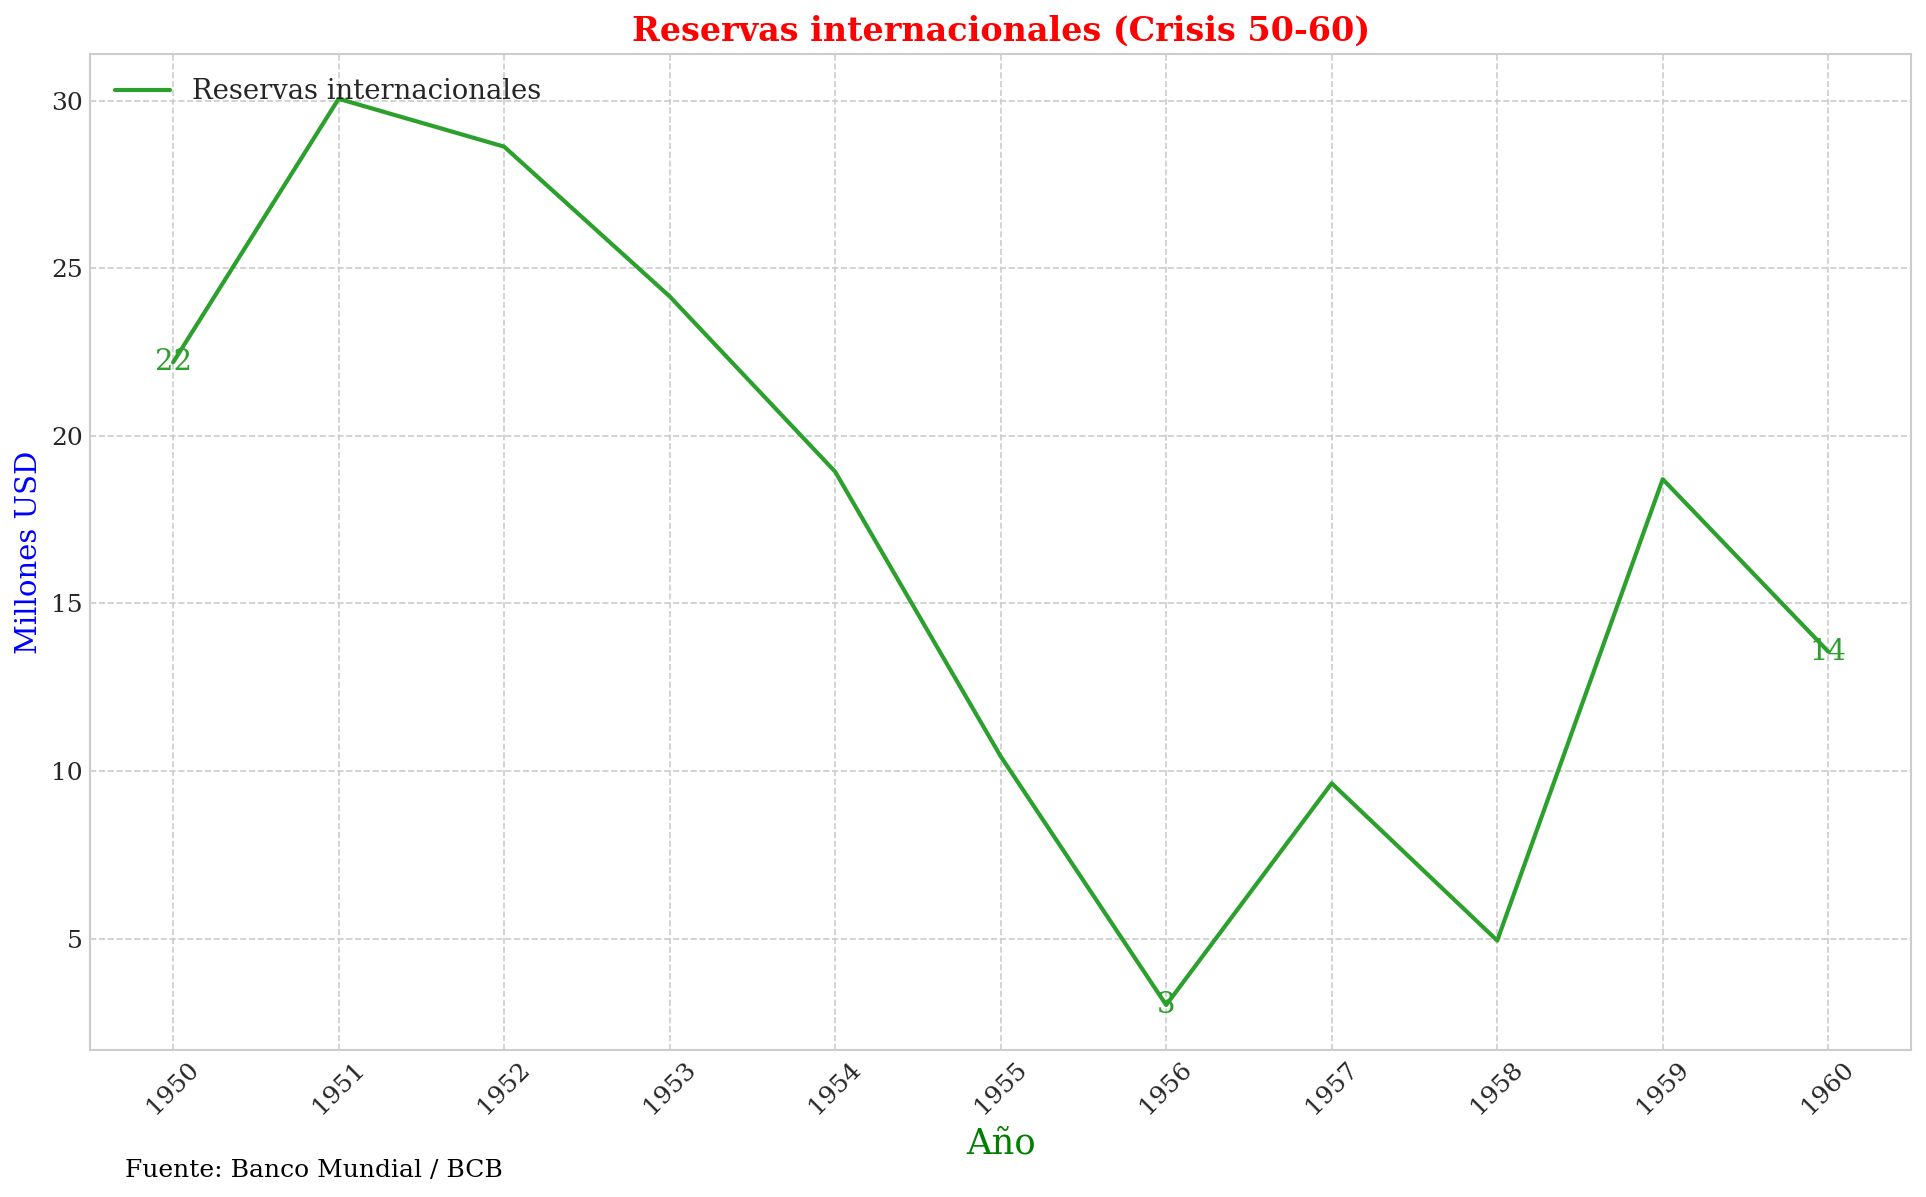

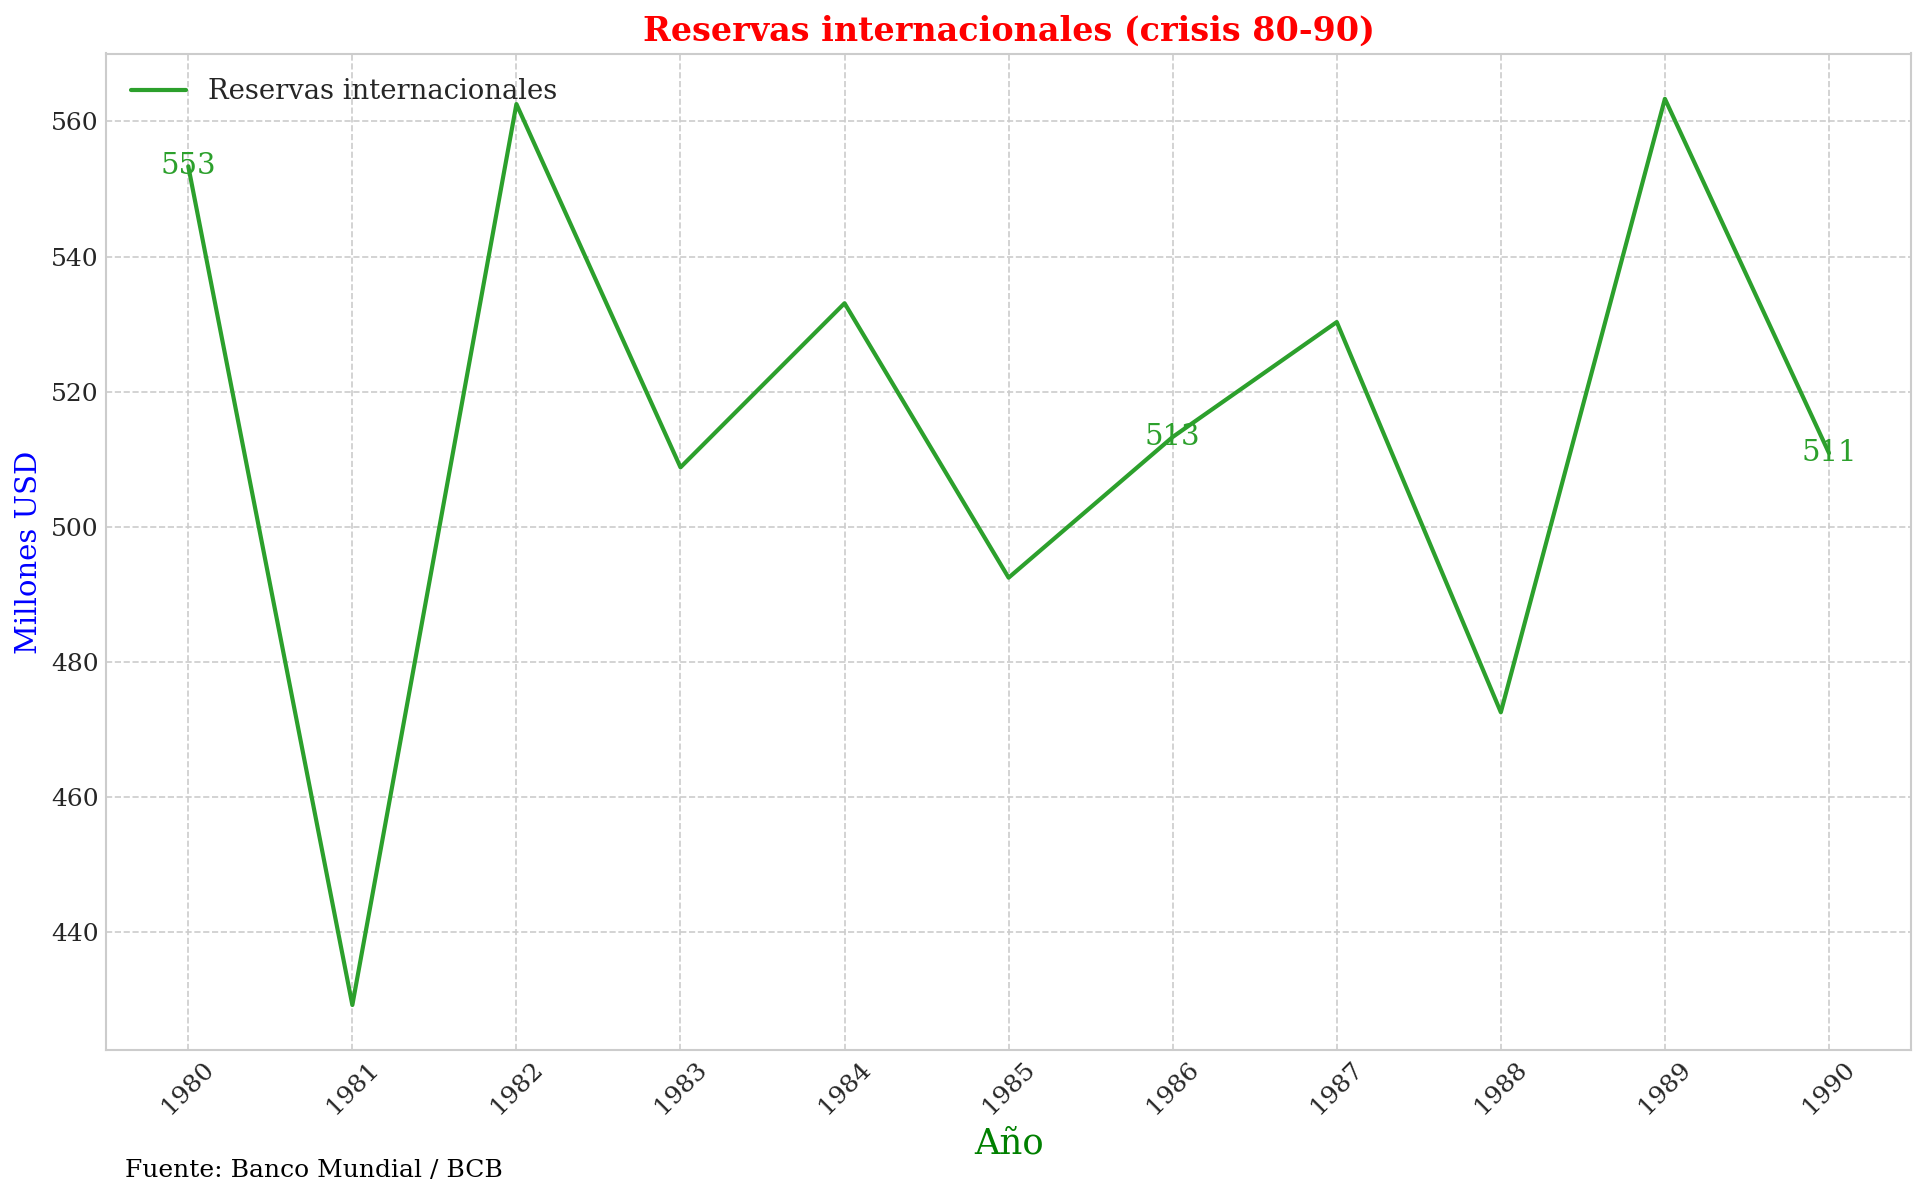

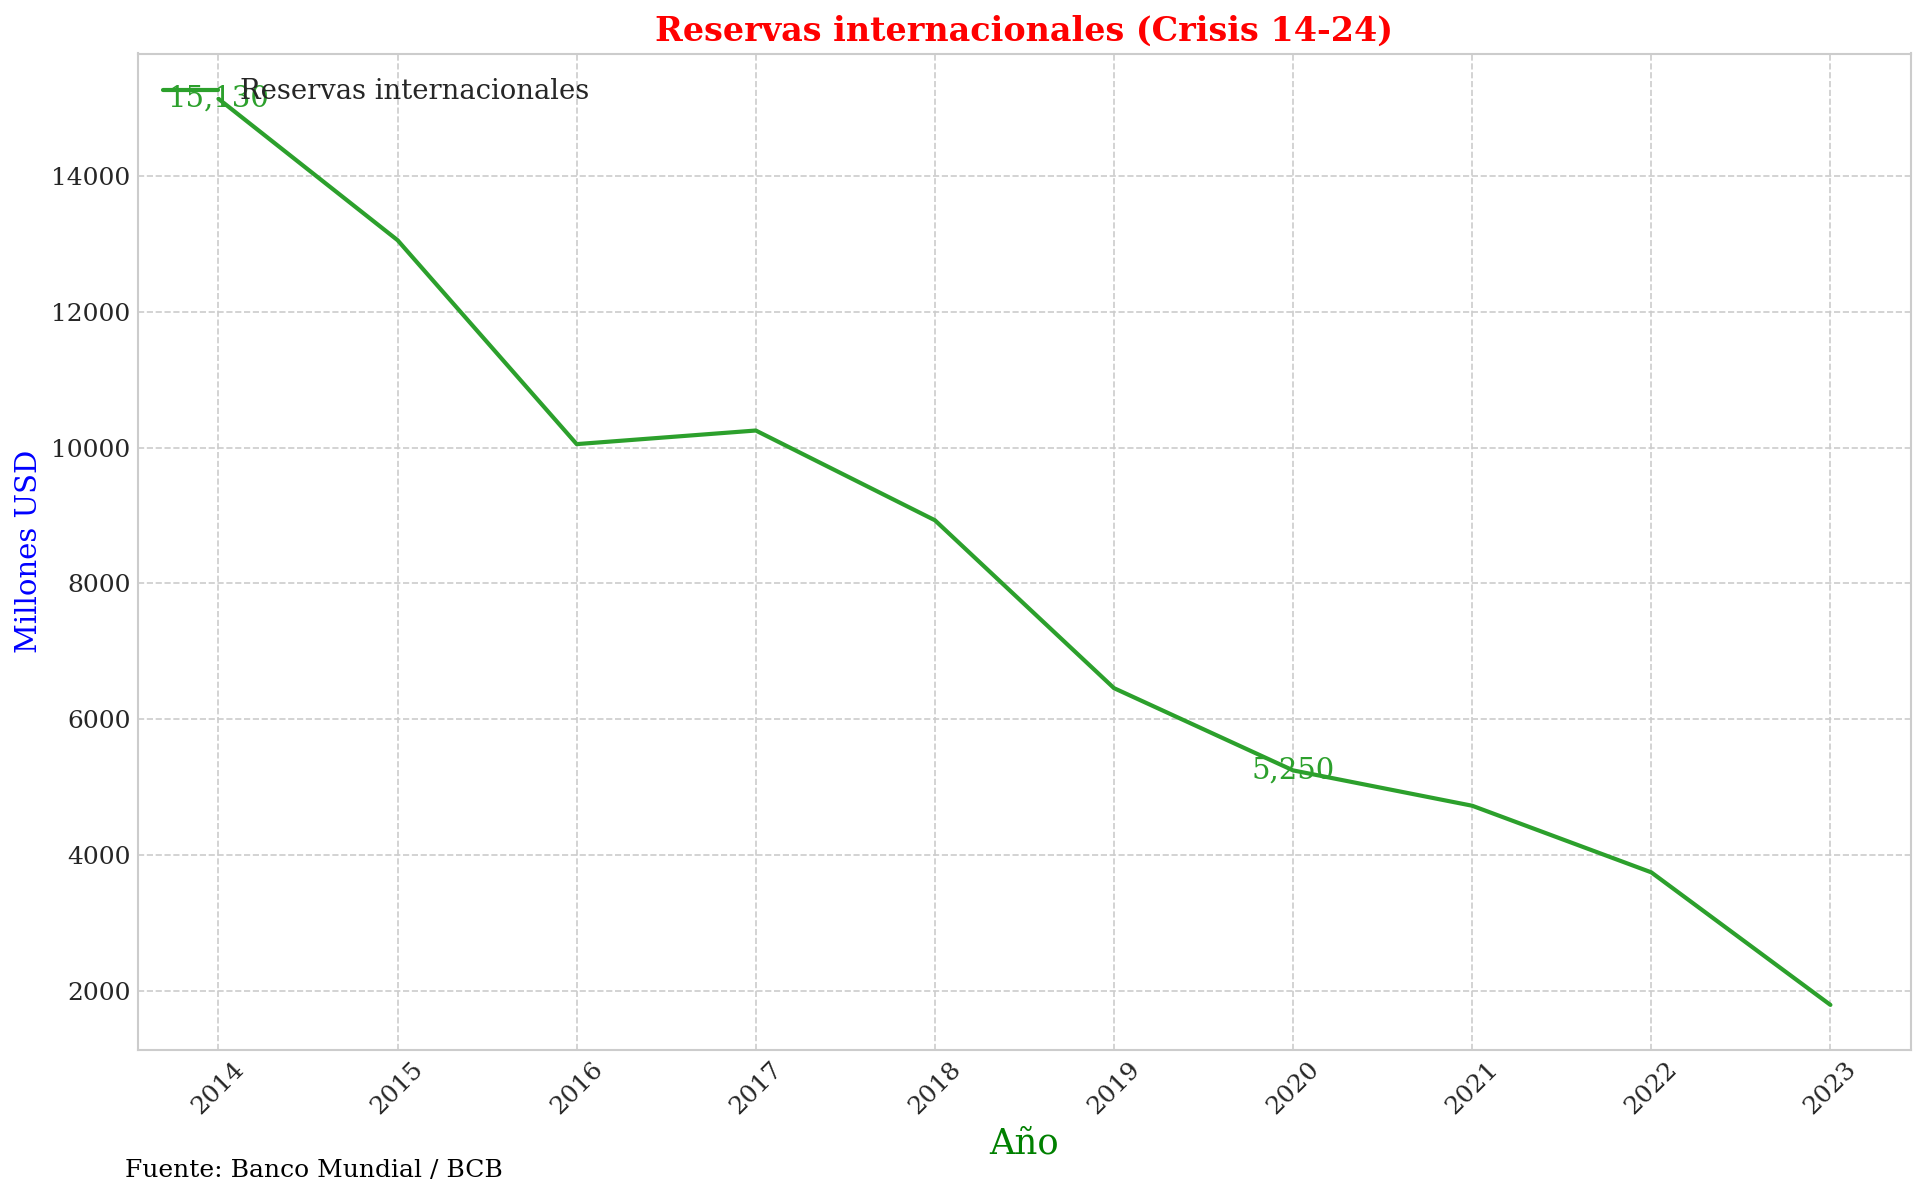

In [4]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta la siguiente línea:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot, add_year_value_annotations, compute_annot_years
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "reservas_internacionales"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      reservas_totales
    FROM Reservas_oro_divisas
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [("reservas_totales", "Reservas internacionales")]
cols_componentes = [col for col, _ in componentes]
colors = {"reservas_totales": "#2ca02c"}


annotation_offsets = {
    "reservas_totales": {
        1950: (0, 0),
        1956: (0, 0),
        1960: (0, 0),
        1980: (0, 0),
        1986: (0, 0),
        1990: (0, 0),
        2014: (0, 0),
        2020: (0, 0),
        2024: (0, 0),
    }
}
extra_annots = {
    "Crisis 50-60": [1956],   # además de 1950 y 1960
    "crisis 80-90": [1986],  # además de 1980 y 1990
    "Crisis 14-24": [2020],
}
# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]

    years_to_annot = compute_annot_years(ini, fin, extra_annots.get(nombre))
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"Reservas internacionales ({nombre})",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Banco Mundial / BCB"
    )
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,              # los años que quieres anotar
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )
    fig.savefig(output_dir / f"reservas_{nombre}.png")
    plt.show()  # Mostrar la figura en pantalla
    plt.close(fig)